In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [33]:
def f(y,x):

    dydx =  x + 2*y

    return dydx

In [34]:
def RungeKutta(f, y, x, h):
    k1 = f(y,x)
    k2 = f(y + 0.5 * k1*h,x+0.5*h)
    k3 = f(y + 0.5 * k2*h,x+0.5*h)
    k4 = f(y + k3*h, x+h)
    return (k1 + 2 * k2 + 2 * k3 + k4)* (h/ 6)
def Adams(f,y0,x):

    h = x[1] - x[0]
    
    y = np.zeros_like(x)
    y[0] = y0

    #Calcular primeros 5 pasos

    for i in range(1,5):
        p = RungeKutta(f,y[i-1],x[i-1],h)
        y[i] = y[i-1] + p


    yc = y.copy()

    #Adams Bash.

    for i in range(5,len(x)):
        
        K21 = f(y[i-1],x[i-1])
        K22 = f(y[i-2],x[i-2])
        K23 = f(y[i-3],x[i-3])
        K24 = f(y[i-4],x[i-4])
        K25 = f(y[i-5],x[i-5])

        y[i] =   y[i-1] + h*((1901/720)*K21-(2774/720)*K22+(2616/720)*K23-(1274/720)*K24+(251/720)*K25)
       
        yc[i] = y[i]
        
        # Adams Mul.

        K31 = f(y[i],x[i])
        
        yc[i] =  yc[i-1] +  h*((475/1440)*K31+(1427/1440)*K21-(798/1440)*K22+(482/1440)*K23-(173/1440)*K24+(27/1440)*K25)
    return yc

In [35]:
x = np.linspace(0.,4.,100)
y0 = 0
sol = Adams(f,y0,x)


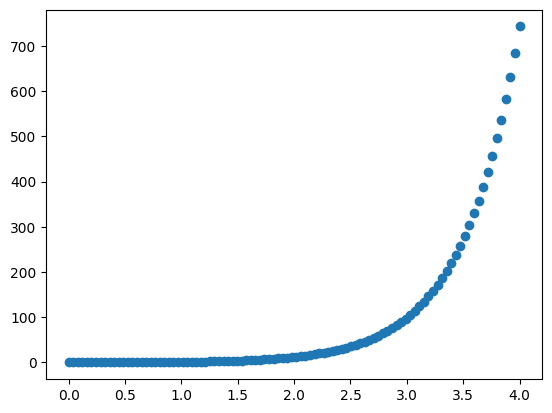

In [36]:
plt.scatter(x,sol)

In [37]:
real = -x/2 -(1- np.exp(2*x))/4

# Gráfica solución real vs la obtenida:


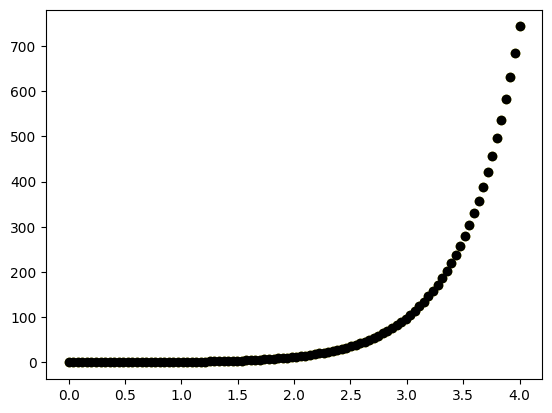

In [38]:
plt.scatter(x,real,color='y')
plt.scatter(x,sol,color='k')

# Escala logaritmica

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23416\3708563774.py:1: RuntimeWarning: divide by zero encountered in log
  log = np.log(np.abs(real-sol))


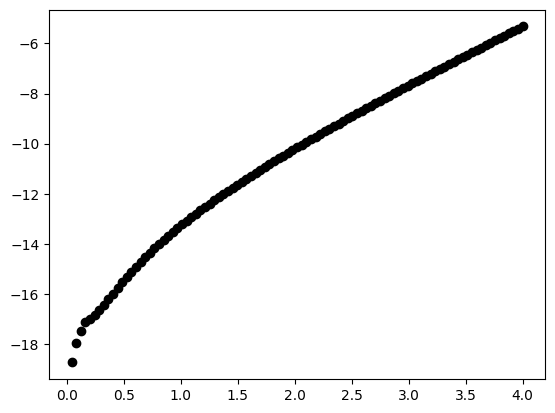

In [39]:
log = np.log(np.abs(real-sol))
plt.scatter(x,log,color='k')